In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from analytical import analytical_method
from explicit import explicit_method
from implicit import implicit_method

In [2]:
# !pip install seaborn
# ! pip install sympy

In [3]:
methods = [analytical_method, implicit_method, explicit_method]
methods_str = ['Analytical', 'Implicit', 'Explicit']
colours = ['blue', 'green', 'red']
linestyles = ['solid', 'dashed', 'dotted', 'dashdot']

In [103]:
methods = [analytical_method, explicit_method]
methods_str = ['Analytical', 'Explicit']
colours = ['blue', 'red']
linestyles = ['solid', 'dotted']

In [109]:
methods = [analytical_method, implicit_method]
methods_str = ['Analytical', 'Implicit']
colours = ['blue', 'green']
linestyles = ['solid', 'dashed']

In [10]:
markers = ['o', 'v', 's', 'p', 'P', '*', 'X', 'D', 'd', '1', '2', '3', '4', '8', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|',
           '_']

In [9]:
step_time = 100
period = 600 
round_v = 6
L = 100
step_space = 20

In [6]:
temp_dist_at_intervals = {}
final_temps = {}
temp_evols = {}
for method, method_str in zip(methods, methods_str):
    comp_matrix = method()
    temp_dist_at_intervals[method_str] = comp_matrix
    final_temps[method_str] = comp_matrix[-1, :]
    temp_evols[method_str] = comp_matrix[:, 1]

Δt=100, Δx=20, λ = 0.20875
Δt=100, Δx=20, λ = 0.20875
Explicit solution is STABLE


In [7]:
temp_evol_df = pd.DataFrame().from_dict(temp_evols)
temp_evol_df['t'] = np.arange(0, period + 1, step_time)
# temp_evol_df.round(round_v).to_csv('data/temp_evolution_at_x20.csv')

In [8]:
temp_evol_df

,Analytical,Implicit,Explicit,t
0,499.999983,500.000000,500.000000,0
1,439.146281,412.939974,395.625000,100
2,363.093530,353.467795,334.826563,200
3,314.038740,310.492009,294.863169,300
4,279.500959,277.624394,265.336260,400
5,252.772492,251.165619,241.451454,500
6,230.576880,228.955176,220.962066,600


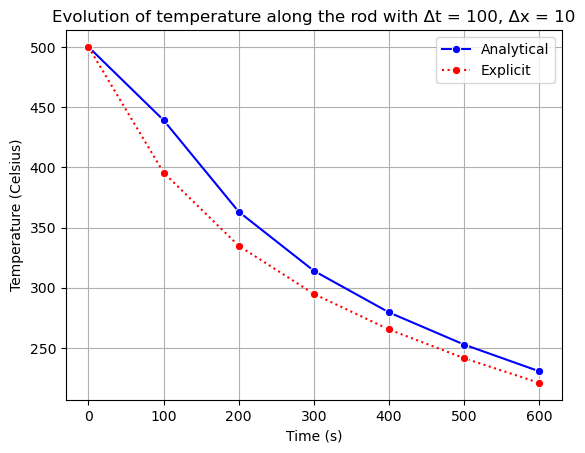

In [107]:
# Plot the evolution temperature
fig, ax = plt.subplots()
plt.grid()
plt.title(f'Evolution of temperature along the rod with Δt = {step_time}, Δx = {step_space}')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (Celsius)')
for i, method_str in enumerate(methods_str):
    sns.lineplot(data=temp_evol_df, y=method_str, x='t', label=method_str, ax=ax, marker="o",
                    linestyle=linestyles[i], color=colours[i])
ax.legend()
plt.savefig('charts/temp_evolution_at_x20_explicit.png')
plt.show()

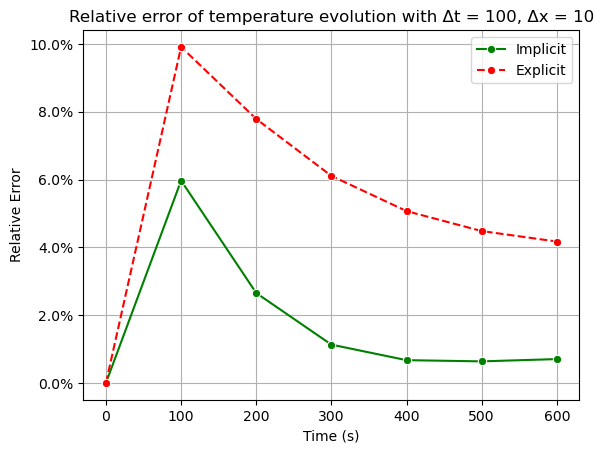

In [102]:
# Calculate error
relative_errors = [np.abs(temp_evols['Analytical'] - temp_evols['Implicit']) / temp_evols['Analytical'],
                    np.abs(temp_evols['Analytical'] - temp_evols['Explicit']) / temp_evols['Analytical']]

# Plot the relative error
fig, ax = plt.subplots()
plt.grid()
plt.title(f'Relative error of temperature evolution with Δt = {step_time}, Δx = {step_space}')
plt.xlabel('Time (s)')
plt.ylabel('Relative Error')
for i, relative_error in enumerate(relative_errors):
    sns.lineplot(data=temp_evol_df, y=relative_error, x='t', label=methods_str[i + 1], ax=ax, marker="o",
                    linestyle=linestyles[i], color=colours[i + 1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.legend()
plt.savefig('charts/temp_evolution_error_at_x20_explicit.png')
plt.show()

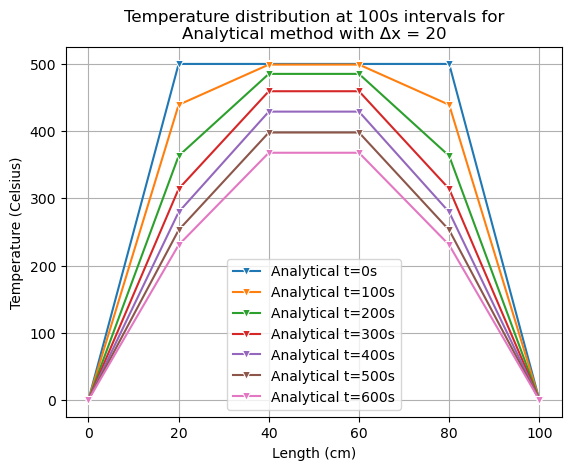

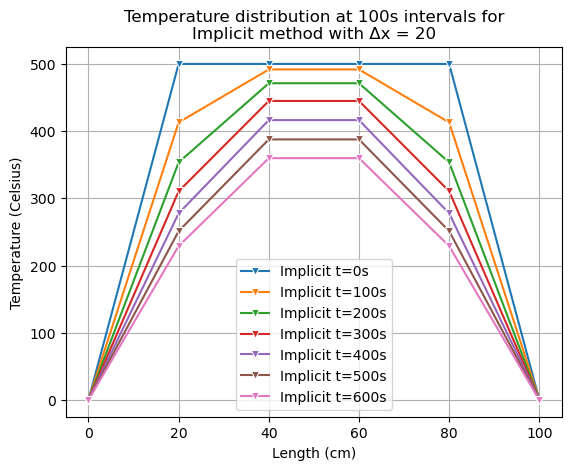

In [82]:
# Plot the temperature distribution along the bar at 100s intervals
for i, temp_dist_at_interval in enumerate(temp_dist_at_intervals.values()):
    fig, ax = plt.subplots()#figsize=(8, 8))
    plt.grid()
    plt.title(f'Temperature distribution at 100s intervals for\n' + rf'{methods_str[i]} method with Δx = {step_space}')
    plt.xlabel('Length (cm)')
    plt.ylabel('Temperature (Celsius)')
    for j, temp_dist in enumerate(temp_dist_at_interval):
        sns.lineplot(x=np.arange(0, L + 1, step_space), y=temp_dist, marker='v',
                        label=methods_str[i] + f' t={j * step_time}s', ax=ax)
    ax.legend()
    # plt.ylim(325, 510)
    plt.savefig(f'charts/temp_dist_at_intervals_{methods_str[i]}.png')
    plt.show()

In [83]:
temp_evol_df

,Analytical,Implicit,t
0,499.999983,500.000000,0
1,439.146281,412.939974,100
2,363.093530,353.467795,200
3,314.038740,310.492009,300
4,279.500959,277.624394,400
5,252.772492,251.165619,500
6,230.576880,228.955176,600


In [84]:
step_times = [100, 50, 100]
step_spaces = [20, 20, 10]

In [112]:
run_ids = []
final_temps = {}
temp_evols = {}
method = methods[methods_str.index(method_str)]
print(method.__name__, method_str)
# max_step_sizes = np.max([step_spaces, step_times], axis=1)
for step_space, step_time in zip(step_spaces, step_times):
    run_id = f'{method_str},Δt={step_time},Δx={step_space}'
    comp_matrix = method(step_time=step_time, step_space=step_space)
    final_temps[run_id] = comp_matrix[-1, :]
    step_20 = int(20 / step_space)
    temp_evols[run_id] = comp_matrix[:, step_20]
    run_ids.append(run_id)

implicit_method Implicit
Δt=100, Δx=20, λ = 0.20875
Δt=50, Δx=20, λ = 0.104375
Δt=100, Δx=10, λ = 0.835


In [9]:
colours = ['blue', 'green', 'red', 'orange']
linestyles = ['solid', 'dashed', 'dotted', 'dashdot']

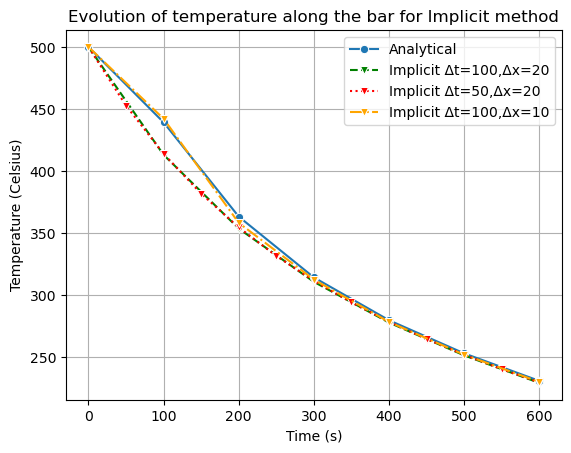

In [114]:
fin_temp = []
columns = []

fig, ax = plt.subplots()
plt.grid()
plt.title(f'Evolution of temperature along the bar for {method_str} method')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (Celsius)')
y = analytical_method()[:, 1]

fin_temp.append(y[-1])
columns.append(methods_str[0])

t = np.arange(0, period + 1, step_times[0])
sns.lineplot(y=y, x=t, label=methods_str[0], ax=ax, marker="o", linestyle=linestyles[0])
for i, (step_space, step_time) in enumerate(zip(step_spaces, step_times)):
    id = f' Δt={step_time},Δx={step_space}'
    t = np.arange(0, period + 1, step_time)
    y = temp_evols[run_ids[i]]
    fin_temp.append(y[-1])
    columns.append(method_str + id)
    sns.lineplot(y=y, x=t, label=method_str + id, ax=ax, marker="v",
                    linestyle=linestyles[i+1], color=colours[i+1])
ax.legend()
fin_temp_df = pd.DataFrame([fin_temp], columns=columns)
plt.savefig(f'charts/temp_evolution_for_{method_str}.png')

In [115]:
fin_temp_df

,Analytical,"Implicit Δt=100,Δx=20","Implicit Δt=50,Δx=20","Implicit Δt=100,Δx=10"
0,230.57688,228.955176,229.317966,229.712404


In [18]:
from analytical import tune_analytical_solution_input_fixed, analytical_method_update_scheme

In [19]:
tune_analytical_solution_input_fixed(20, 100)

100%|██████████| 10/10 [00:03<00:00,  2.79it/s]

Temperature distributions: [439.1462807799953, 439.1462807799953, 439.1462807799953, 439.1462807799953, 439.1462807799953, 439.1462807799953, 439.1462807799953, 439.1462807799953, 439.1462807799953, 439.1462807799953]
Absolute errors: [nan  0.  0.  0.  0.  0.  0.  0.  0.  0.]
The first N value that produces an error below the threshold of 0.0001 is 0.0


In [4]:
from tqdm import tqdm 

In [21]:
x=1
t=1

In [24]:
# Generate a list of odd N values to use in the analytical solution
N_list = np.array([101, 1001, 5007, 10001, 50007, 100001, 500_007, 1_000_001, 5_000_007, 10_000_001])
N_list = np.array([1,11,101])
# Evaluate the analytical solution for each N value
relative_errors = []
b = 1
N =1 
while True:
    new = analytical_method_update_scheme(x=x, t=t, N=N)
    # relative error
    error = np.abs(new - b)
    relative_errors.append(error)
    b = new
    if error < np.finfo(float).eps:
        print(f'N={N} is sufficient to achieve a relative error of {error}')
        break
    N += 2


N=195 is sufficient to achieve a relative error of 0.0


In [26]:
import sympy

In [35]:
# log10 all the relative errors with sympy
log10_relative_errors = [sympy.log(error, 10) for error in relative_errors]

In [33]:
sympy.log(2.94339830915036, 10)

1.07956480129312/log(10)

In [31]:
log10_relative_errors

[2.94339830915036/log(10),
 2.98683438659812/log(10),
 2.971013751631/log(10),
 2.94727757688722/log(10),
 2.91561955132522/log(10),
 2.87603118561136/log(10),
 2.82850174655233/log(10),
 2.77301817306145/log(10),
 2.70956497218646/log(10),
 2.63812409333692/log(10),
 2.55867477840134/log(10),
 2.4711933849203/log(10),
 2.37565317886266/log(10),
 2.27202409281161/log(10),
 2.16027244447404/log(10),
 2.04036060933871/log(10),
 1.91224663997456/log(10),
 1.77588382281011/log(10),
 1.63122016117949/log(10),
 1.4781977708409/log(10),
 1.31675217091119/log(10),
 1.1468114490035/log(10),
 0.968295274013967/log(10),
 0.781113723084347/log(10),
 0.585165880220584/log(10),
 0.380338152108691/log(10),
 0.166502230747665/log(10),
 -0.0564873889391196/log(10),
 -0.288796457624837/log(10),
 -0.530614747773988/log(10),
 -0.782160775682858/log(10),
 -1.04368776804428/log(10),
 -1.31549128806913/log(10),
 -1.59791910741912/log(10),
 -1.89138416723907/log(10),
 -2.19638186604289/log(10),
 -2.5135135327

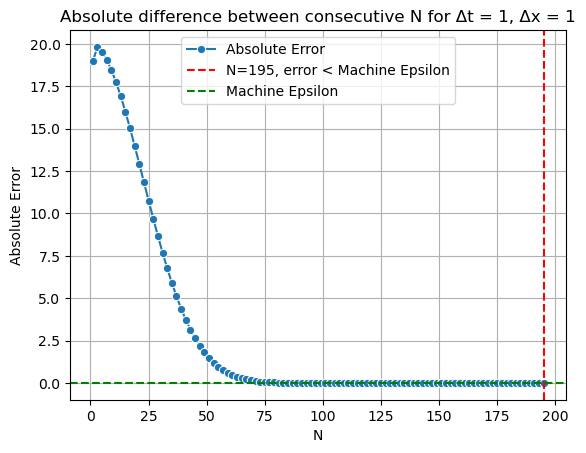

In [37]:
# Plot the relative error
fig, ax = plt.subplots()
plt.grid()
plt.title(f'Absolute difference between consecutive N for Δt = {x}, Δx = {t}')
plt.xlabel('N')
plt.ylabel('Absolute Error')
sns.lineplot(y=relative_errors, x=np.arange(1, N+1, 2), ax=ax, marker="o", label='Absolute Error')
ax.legend()
# plot a straight vertical line at the last N value
plt.axvline(x=N, color='r', linestyle='--', label='N=195, error < Machine Epsilon')
# plot a straight horizontal line at the machine epsilon = 2.220446049250313e-16
plt.axhline(y=np.finfo(float).eps, color='g', linestyle='--', label='Machine Epsilon')
plt.legend()
# plt.xlim(175,200)
# ax.set_yscale('log')
plt.savefig('charts/tuning_analytical.png')
plt.show()

In [38]:
np.finfo(float).eps

2.220446049250313e-16

In [39]:
2.22e-16

2.22e-16

In [71]:
a = analytical_method(20,100, N=195)

In [73]:
b = analytical_method(20,100, N=1_000_001)

In [74]:
a - b

array([[ 0.00000000e+00,  2.24657416e+00, -5.30625328e-01,
        -5.30625328e-01,  2.24657416e+00, -3.89743066e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [9]:
from helper import initial_temperature_distribution

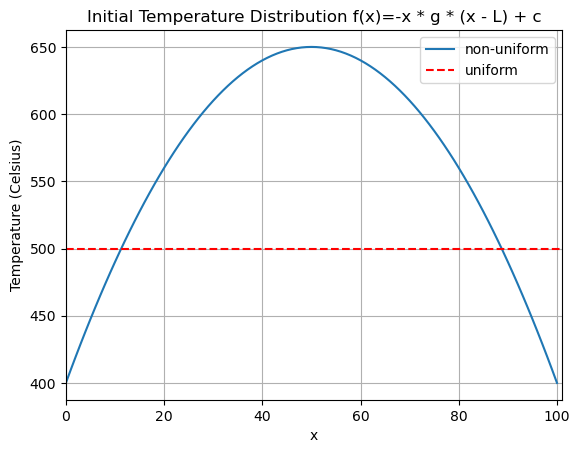

In [124]:
# Generate some x values to plot
x = np.arange(0, 101,1)

# Calculate the initial temperature distribution
T_initial = initial_temperature_distribution(x)

# Plot the initial temperature distribution
plt.plot(x, T_initial, label='non-uniform')
plt.grid()
plt.title("Initial Temperature Distribution f(x)=-x * g * (x - L) + c")
plt.xlabel("x")
plt.axhline(y=500, color='r', linestyle='--', label='uniform')
plt.ylabel("Temperature (Celsius)")
plt.xlim(0,101)
plt.legend()
plt.savefig('charts/initial_temperature_distribution.png')
plt.show()

In [44]:
def lambda_search(step_spaces, step_times, fix: str = 'x', L=100, k=0.835, period=60, initial_cond=True, method_str = 'Implicit'):
    """
    Searches for the optimal value of lambda (k * step_time / step_space^2)
    for the given step space and step time values by applying the implicit
    method for the heat equation.

    Args:
    step_spaces (numpy.ndarray): array of step space values
    step_times (numpy.ndarray): array of step time values
    L (int): length of the spatial domain
    k (float): thermal diffusivity constant

    Returns:
    pandas.DataFrame: dataframe containing the final temperature values for
    each combination of step space and step time values and their corresponding
    lambda values.
    """
    final_temps = {}
    # Iterate through the step space and step time values
    for step_space, step_time in zip(step_spaces, step_times):
        # Calculate lambda for the given step space and step time values
        lambda_ = k * step_time / step_space ** 2

        # Generate a run ID using the step space, step time, and lambda values
        run_id = f'Δt={step_time}, Δx={np.round(step_space, 2)}'#, λ={np.round(lambda_, 2)}'

        # Apply the implicit method to calculate the final temperature values
        method = implicit_method if method_str == 'Implicit' else explicit_method
        comp_matrix = method(step_time=step_time, step_space=step_space, initial_cond=initial_cond,
                                      time_limit=period, L=L, k=k)
        ind_at20 = int(comp_matrix.shape[1] / (L / step_space)) + 1
        temp_dist = comp_matrix[:, ind_at20]
        final_temps[run_id] = temp_dist

    fig, ax = plt.subplots()
    plt.grid()
    plt.title(f'{method_str} Method: Temperature Oscillations at x=20 for t <= 60s')
    plt.ylabel('Temperature (Celsius)')
    plt.xlabel('Time (s)')
    for i, (k, v) in enumerate(final_temps.items()):
        xrange = np.arange(0, period + step_times[i], step_times[i])
        markevery = 10 * step_times[i] if step_times[i] < 1 else 1
        markevery = 10
        print(len(xrange), len(v))
        sns.lineplot(y=v, x=xrange, label=k, ax=ax, linestyle='dashed', color=colours[i],
                     marker=markers[i], markersize=5, markevery=markevery)
    ax.legend()
    plt.savefig(f'charts/temp_dist_for_task3_fix_{fix}_{method_str}_initial_cond_{initial_cond}.png')
    plt.show()

Δt=1.0, Δx=1.0, λ = 0.835
Δt=1.0, Δx=0.1, λ = 83.49999999999999
Δt=1.0, Δx=0.01, λ = 8350.0
61 61
61 61
61 61


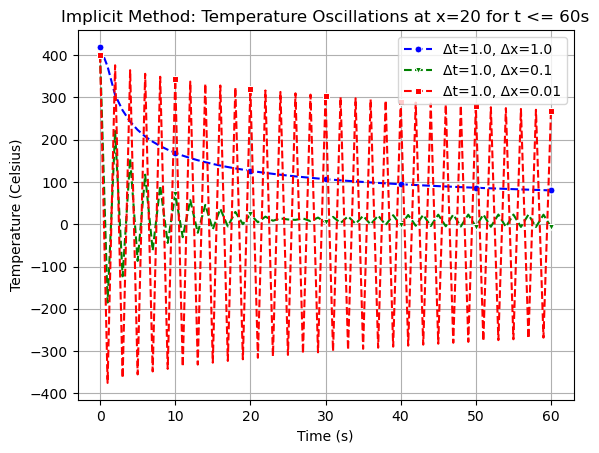

In [42]:
step_spaces = np.array([1, 1e-1, 1e-2], dtype=float)
step_times = np.full_like(step_spaces, 1)
lambda_search(step_spaces=step_spaces, step_times=step_times, fix='t', L=100, k=0.835, period=60, initial_cond=True)

In [23]:
def get_t(step_space, lambda_ = 1/2, k=0.835):
    return (lambda_ * step_space ** 2)/k

In [ ]:
lambda_ = step_time * k / step_space**2

Δt=1.0, Δx=0.1, λ = 83.49999999999999
Δt=0.1, Δx=0.1, λ = 8.35
Δt=0.01, Δx=0.1, λ = 0.8349999999999999


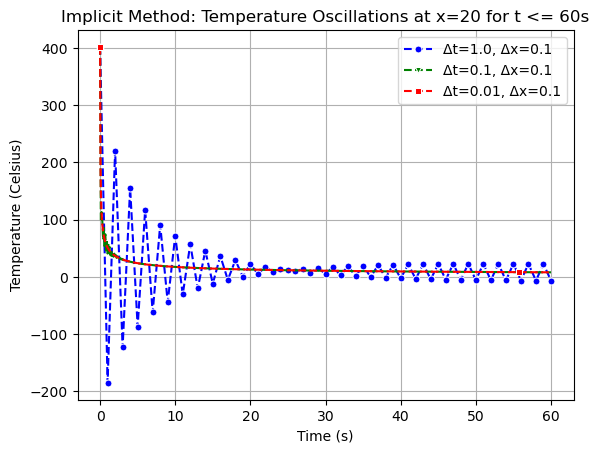

In [17]:
step_times = np.array([3, 1, 1e-1], dtype=float)
step_times = np.array([1, 1e-1, 1e-2], dtype=float)
step_spaces = np.full_like(step_times, 1e-1)
# lambda_search(step_spaces=step_spaces, step_times=step_times, fix='x', L=100, k=0.835, period=60, initial_cond=True)

Δt=0.01, Δx=0.1, λ = 0.8349999999999999
Δt=0.05, Δx=0.1, λ = 4.175


Calculating Crank-Nicholson Matrices: 1200it [00:16, 73.40it/s]


Δt=0.09, Δx=0.1, λ = 7.514999999999998


Calculating Crank-Nicholson Matrices: 667it [00:08, 77.56it/s]


6001 6001
1201 1201
668 668


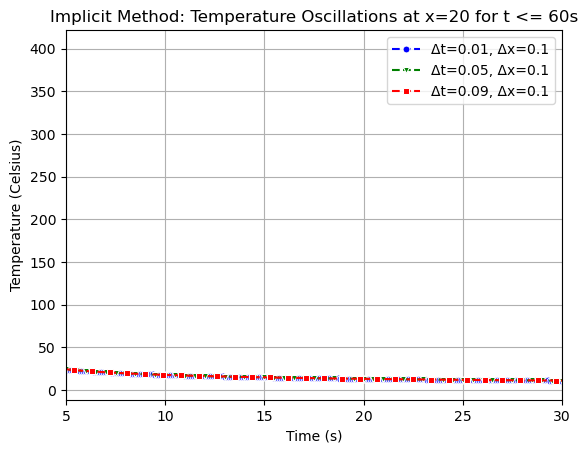

In [58]:
step_times = np.array([3, 1, 1e-1], dtype=float)
step_times = np.array([1e-2, 5e-2, 9e-2], dtype=float)
step_spaces = np.full_like(step_times, 1e-1)
lambda_search(step_spaces=step_spaces, step_times=step_times, fix='x', L=100, k=0.835, period=60, initial_cond=True)

In [50]:
# step_times = np.array([1e-2, 5e-2, 9e-2], dtype=float)
# step_spaces = np.full_like(step_times, 1e-1)

# step_times = np.array([1e-1, 2e-1], dtype=float)
# step_spaces = np.full_like(step_times, 2)

# step_times = np.array([10, 5, 1], dtype=float)
# step_spaces = np.full_like(step_times, 1)

step_spaces = np.array([1e-1, 5e-2], dtype=float)
step_times = np.full_like(step_spaces, 1e-1)

step_spaces = np.array([1e-1, 5e-1, 9e-1], dtype=float)
step_times = np.full_like(step_spaces, 1e-2)

method_str = 'Implicit'

Δt=0.01, Δx=0.1, λ = 0.8349999999999999


Calculating Crank-Nicholson Matrices: 6000it [01:14, 80.32it/s]


Δt=0.01, Δx=0.5, λ = 0.0334


Calculating Crank-Nicholson Matrices: 6000it [00:04, 1369.45it/s]


Δt=0.01, Δx=0.9, λ = 0.010308641975308641


Calculating Crank-Nicholson Matrices: 6000it [00:02, 2376.90it/s]


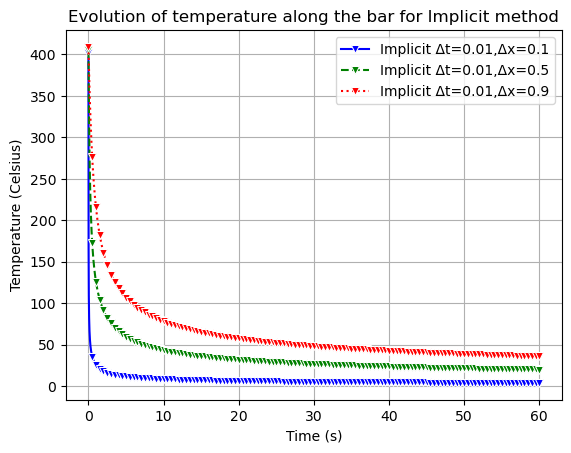

In [53]:
fin_temp = []
columns = []

fig, ax = plt.subplots()
plt.grid()
plt.title(f'Evolution of temperature along the bar for {method_str} method')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (Celsius)')
# y = analytical_method()[:, 1]

# fin_temp.append(y[-1])
# columns.append(methods_str[0])
period = 60
# t = np.arange(0, period + 1, step_times[0])
# sns.lineplot(y=y, x=t, label=methods_str[0], ax=ax, marker="o", linestyle=linestyles[0])
for i, (step_space, step_time) in enumerate(zip(step_spaces, step_times)):
    id = f' Δt={step_time},Δx={step_space}'
    t = np.arange(0, period + step_time, step_time)
    comp_matrix = implicit_method(step_time=step_time, step_space=step_space, initial_cond=True,
                                      time_limit=period, L=L, k=0.835)
    y = comp_matrix[:, 1]
    fin_temp.append(y[-1])
    columns.append(method_str + id)
    markevery = 50
    sns.lineplot(y=y, x=t, label=method_str + id, ax=ax, marker="v",
                    linestyle=linestyles[i], color=colours[i], markevery=markevery)
ax.legend()
plt.show()

In [52]:
fin_temp_df = pd.DataFrame([fin_temp], columns=columns)
fin_temp_df

,"Implicit Δt=0.01,Δx=0.1","Implicit Δt=0.01,Δx=0.5","Implicit Δt=0.01,Δx=0.9"
0,4.028573,20.137852,36.227042


Δt=0.01, Δx=0.1, λ = 0.8349999999999999
Δt=0.01, Δx=0.5, λ = 0.0334


Calculating Crank-Nicholson Matrices: 6000it [00:03, 1969.05it/s]


Δt=0.01, Δx=0.9, λ = 0.010308641975308641


Calculating Crank-Nicholson Matrices: 6000it [00:01, 3710.63it/s]


6001 6001
6001 6001
6001 6001


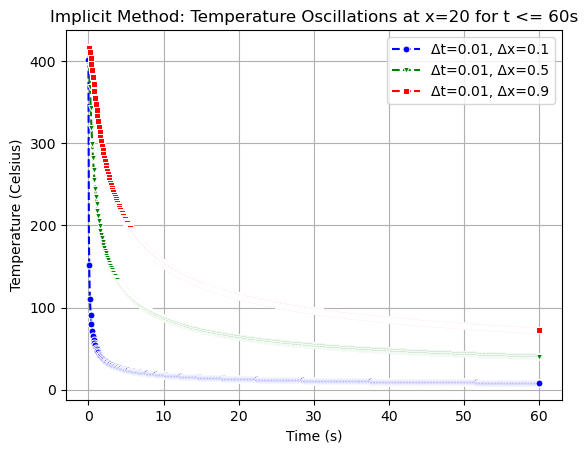

In [48]:
step_spaces = np.array([1e-1, 5e-1, 9e-1], dtype=float)
step_times = np.full_like(step_spaces, 1e-2)
lambda_search(step_spaces=step_spaces, step_times=step_times, fix='t', L=100, k=0.835, period=60, initial_cond=True)

In [49]:
step_spaces = np.array([10, 1, 1e-1], dtype=float)
step_times = np.full_like(step_spaces, 2e-2)
lambda_search(step_spaces=step_spaces, step_times=step_times, fix='t', L=100, k=0.835, period=60, initial_cond=True)

Δt=0.02, Δx=10.0, λ = 0.000167


Calculating Crank-Nicholson Matrices: 3000it [00:00, 26859.82it/s]

Δt=0.02, Δx=1.0, λ = 0.0167



Calculating Crank-Nicholson Matrices: 3000it [00:00, 4479.76it/s]


Δt=0.02, Δx=0.1, λ = 1.6699999999999997


Calculating Crank-Nicholson Matrices: 267it [00:03, 67.98it/s]


KeyboardInterrupt: 

Δt=1.0, Δx=1.0, λ = 0.835
Δt=1.0, Δx=0.1, λ = 83.49999999999999
Δt=1.0, Δx=0.01, λ = 8350.0


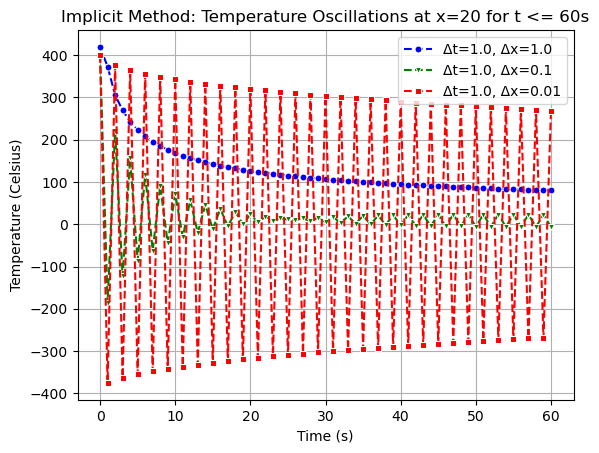

In [18]:
step_spaces = np.array([1, 1e-1, 1e-2], dtype=float)
step_times = np.full_like(step_spaces, 1)
lambda_search(step_spaces=step_spaces, step_times=step_times, fix='t', L=100, k=0.835, period=60, initial_cond=True)

Δt=3.0, Δx=0.1, λ = 250.49999999999994
Explicit solution is UNSTABLE
Δt=1.0, Δx=0.1, λ = 83.49999999999999
Explicit solution is UNSTABLE
Δt=0.1, Δx=0.1, λ = 8.35
Explicit solution is UNSTABLE


/Users/vladislav/PycharmProjects/PDE_Numerical/src/explicit.py:67: RuntimeWarning: overflow encountered in double_scalars
  cm[j+1][i] = lambda_ * (cm[j][i-1] + cm[j][i] * (-2.0 + 1.0/lambda_) + cm[j][i+1])
/Users/vladislav/PycharmProjects/PDE_Numerical/src/explicit.py:67: RuntimeWarning: invalid value encountered in double_scalars
  cm[j+1][i] = lambda_ * (cm[j][i-1] + cm[j][i] * (-2.0 + 1.0/lambda_) + cm[j][i+1])


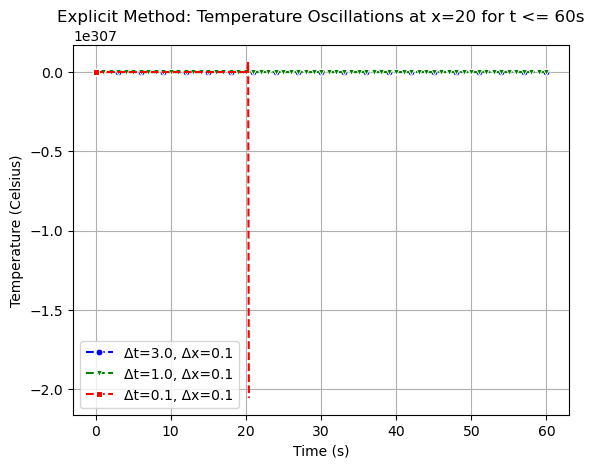

In [19]:
step_times = np.array([3, 1, 1e-1], dtype=float)
# step_times = np.array([1, 1e-1, 1e-2], dtype=float)
step_spaces = np.full_like(step_times, 1e-1)
lambda_search(step_spaces=step_spaces, step_times=step_times, fix='x', L=100, k=0.835, period=60, initial_cond=True, method_str='Explicit')

Δt=0.5988023952095809, Δx=1.0, λ = 0.5
Explicit solution is STABLE
Δt=0.00598802395209581, Δx=0.1, λ = 0.5
Explicit solution is STABLE
102 102
10021 10021


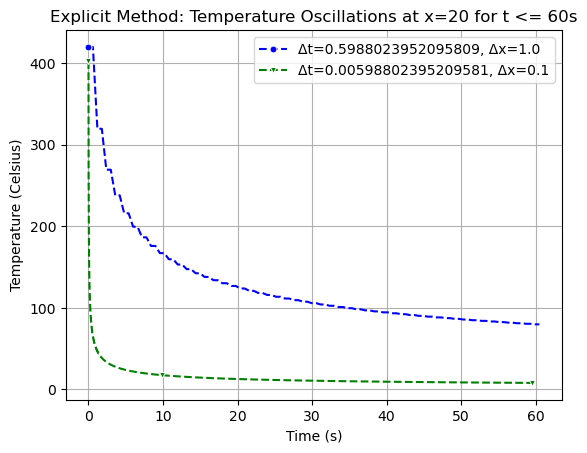

In [35]:
step_spaces = np.array([1, 1e-1], dtype=float)
step_times = np.full_like(step_spaces, 1)
step_times = get_t(step_spaces, lambda_=1/2)
lambda_search(step_spaces=step_spaces, step_times=step_times, fix='t', L=100, k=0.835, period=60, initial_cond=True, method_str='Explicit')